In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# getting the dataset

df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


The varable **total** is the amount of people invloved in a fatal car accident. States are different sizes and so numbers vary per billion miles. This variable is not the total ammount of accidents that took place.   
The variables **speeding**,	**alcohol**, **not_distracted**	, **no_previous** are all based on the amount of people who were invovled in that type of car accident.  
The variables **ins_premium** and 	**ins_losses** are based on currencies possible USD . 	 

In [3]:
df.isna().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


### What is the distribution of the total number of accidents across states?            

<Axes: xlabel='abbrev', ylabel='total'>

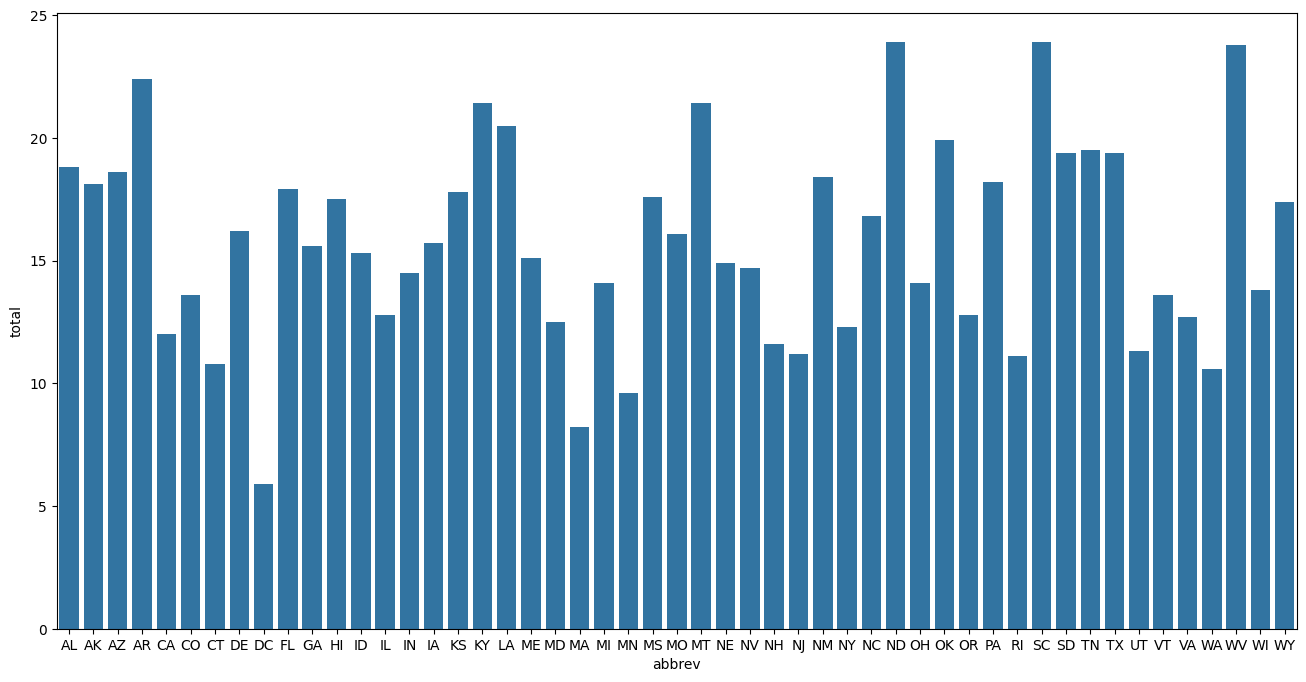

In [6]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x="abbrev", y="total")

The distribution of total number of accidents across states is all over the place. There seems to be no correlation because all the values between the different states since they are all independent variables.

### What is the relationship between the number of speeding-related accidents and the number of alcohol-related accidents?


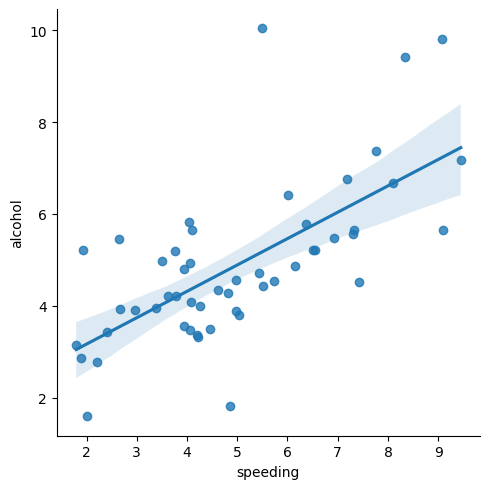

In [7]:
sns.lmplot(data=df, x="speeding", y="alcohol")

**I need to describe this relationship**. I know it's liner and semm related but these are two independent varibles. But seem very correlated

### Is there a correlation between the total number of accidents and the percentage of drivers who were speeding?


In [ ]:
# make a correlation matrix between total accidents and drivers speeding ????
# make a speeding_percent clolumn


### Does the proportion of drivers who were not distracted have an effect on the total number of accidents?

### 5) Is there a relationship between the number of car accidents and the type of day of the week?

The dataset has not column or data points that show days of a week and so there is no relationship between car accidents and type of day of week 

### 6) How well can you predict the number of car crashes in a state based on the other variables in the dataset?


In [ ]:
# we can use linear regression to predict this
# y variable could be 